# 데이터 전처리

## 넘파이로 데이터 준비하기

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [2]:
import numpy as np

In [4]:
np.column_stack(([1,2,3], [4,5,6])) # 넘파이 column_stack 함수는 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결함
# 연결할 리스트는 파이썬 tuple로 전달함

array([[1, 4],
       [2, 5],
       [3, 6]])

In [7]:
fish_data = np.column_stack((fish_length, fish_weight))

In [9]:
print(fish_data[:5]) # 두 리스트가 잘 연결되었는지 처음 5개의 데이터를 확인

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [12]:
# 동일한 데이터로 타깃 데이터 만들기
# np.ones와 np.zeros 를 활용하면 [1]*35 + [0]*14 안해도 됨.
print(np.ones(5))
print(np.zeros(3))

[1. 1. 1. 1. 1.]
[0. 0. 0.]


In [16]:
# 이번에는 np.column_stack() 함수를 사용하지 않고 np.concatenate() 함수를 사용함
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


## 사이킷런으로 훈련 세트와 테스트 세트 나누기

In [17]:
# 사이킷런의 train_test_split() 함수 사용하면 쉽게 할 수 있음

from sklearn.model_selection import train_test_split

In [18]:
# 사용법을 아주 간단함. 나누고 싶은 리스트나 배열을 원하는 만큼 전달하면 됨.

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state=42)
# 전달한 fish_data => train_test_split() 함수를 통해 train_input, test_input으로 나뉨
# 전달한 fish_target => train_test_split() 함수를 통해 train_target, test_target으로 나뉨

In [23]:
# 잘 나뉘었는지 넘파이 배열의 shape 속성으로 입력 데이터의 크기를 출력

print(train_input.shape, test_input.shape) # 2개의 열이 있는 2차원 배열
print(train_target.shape, test_target.shape) # 1차원 배열

(36, 2) (13, 2)
(36,) (13,)


In [24]:
# 도미와 빙어가 잘 섞였는지 테스트 데이터를 출력

print(test_target) # 전체 데이터에서 도미:빙어 = 35:14 의 비율. 지금 만든 테스트셋에서는 도미:빙어 = 10:3. 약간의 sampling bias 발생.

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [28]:
# 이처럼 무작위로 데이터를 나누면 샘플이 골고루 섞이지 않을 수 있음. 
## train set과 test set에 샘플의 클래스 비율이 일정하지 않으면 모델이 일부 샘플을 올바르게 학습할 수 없음

# train_test_split() 함수 사용 시 stratify 매개변수에 타깃 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눔
## 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용함

train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [29]:
print(test_target) # 이제 테스트 셋 비율이 2.25:1. 전체 훈련 데이터의 비율과 꽤 비슷해졌음.

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리

In [30]:
# 앞에서 준비한 데이터로 KNN 훈련(1장에서 했던 것과 동일). 훈련 데이터로 모델 훈련하고, 테스트 데이터로 모델 평가.

from sklearn.neighbors import KNeighborsClassifier # KNeighborsClassifier import
kn = KNeighborsClassifier() # 모델 객체 만들기
kn.fit(train_input, train_target) # 훈련 셋으로 모델 훈련
kn.score(test_input, test_target) # 테스트 셋으로 모델 평가 => 정확도 100% 나옴.

1.0

In [34]:
# 여기에 새로운 도미 데이터를 넣고 결과 확인해보기
print(kn.predict([[25,150]]))

# 예측 틀림.

[0.]


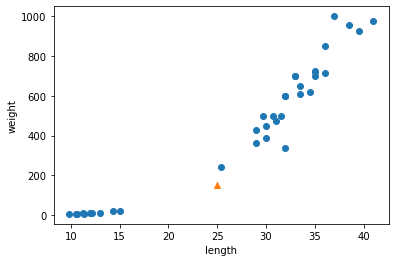

In [36]:
# 왜지? 이 샘플을 다른 데이터와 함께 산점도로 그려보기

import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1]) # blue -> train set. x축은 input_arr의 , y축은 input_arr의 
plt.scatter(25,150, marker='^') # orange -> 새로운 샘플.
plt.xlabel('length')
plt.ylabel('weight')
plt.show() 

# 도미 데이터(오른쪽 위로 뻗어있는 데이터)에 가까운데, 왜 모델은 이 샘플을 빙어에 더 가깝자고 판단했지?

In [37]:
# KNeighborsClassifier 클래스는 주어진 샘플에서 가장 가까운 이웃을 찾아주는 kneighbors() 메서드를 제공함
## kneighbors() 메서드: 이웃까지의 거리와 이웃 샘플의 인덱스를 반환함
### KNeighborsClassifier 클래스의 이웃 개수인 n_neighbors의 기본값을 5이므로, 5개의 이웃이 반환됨

distances, indexes = kn.kneighbors([[25,150]])

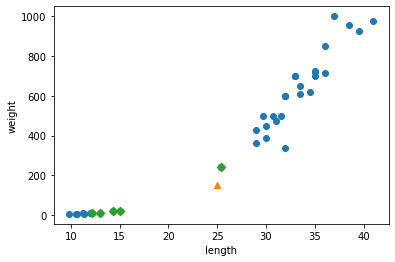

In [39]:
# 넘파이 indexes 배열을 사용해 훈련 데이터 중에서 이웃 샘플을 따로 구분해 그려보기

plt.scatter(train_input[:,0], train_input[:,1]) # blue -> train set. x축은 input_arr의 , y축은 input_arr의 
plt.scatter(25,150, marker='^') # orange -> 새로운 샘플.
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 이웃샘플 5개.
plt.xlabel('length')
plt.ylabel('weight')
plt.show() 

# '^' 샘플에 가장 가까운 5개의 샘플 중 4개가 빙어, 도미는 하나만 포함됨

In [40]:
print(train_input[indexes,0])

[[25.4 15.  14.3 13.  12.2]]


In [41]:
print(train_input[indexes,1])

[[242.   19.9  19.7  12.2  12.2]]


In [42]:
print(train_input[indexes]) # 확실히 가장 가까운 생선 5개 중 4개가 빙어

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [43]:
print(train_target[indexes]) # 타깃 데이터로 확인하면 더 명확하게 볼 수 있음

[[1. 0. 0. 0. 0.]]


In [44]:
# 그러니까 모델이 (25,150) 샘플을 빙어라고 예측한 것도 무리가 아님.
## 모델은 왜 가장 가까운 이웃을 빙어라고 생각한 걸까? 산점도를 보면 직관적으로 도미와 가깝게 보이는데?

# 이 문제의 해결 실마리를 찾기 위해 kneighbors() 메서드에서 반환한 distances 배열을 출력해보자
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]
